**Exploratory Data Analysis**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

In [2]:
from google.colab import files
uploaded = files.upload()

Saving config.py to config (1).py


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
DATA_DIR = "/content/drive/MyDrive/NOVA_IMS/Deep_Learning_Project/rare_species"

In [16]:
METADATA_PATH = "/content/drive/MyDrive/NOVA_IMS/Deep_Learning_Project/rare_species/metadata.csv"

In [17]:
print(f"Data directory: {DATA_DIR}")
print(f"Metadata path: {METADATA_PATH}")

Data directory: /content/drive/MyDrive/NOVA_IMS/Deep_Learning_Project/rare_species
Metadata path: /content/drive/MyDrive/NOVA_IMS/Deep_Learning_Project/rare_species/metadata.csv


**Metadata Analysis**


In [18]:
df = pd.read_csv(METADATA_PATH)
print(f"Total images: {len(df)}")
print(f"\nFirst few rows:")
df.head()

Total images: 11983

First few rows:


,rare_species_id,eol_content_id,eol_page_id,kingdom,phylum,family,file_path
0,75fd91cb-2881-41cd-88e6-de451e8b60e2,12853737,449393,animalia,mollusca,unionidae,mollusca_unionidae/12853737_449393_eol-full-si...
1,28c508bc-63ff-4e60-9c8f-1934367e1528,20969394,793083,animalia,chordata,geoemydidae,chordata_geoemydidae/20969394_793083_eol-full-...
2,00372441-588c-4af8-9665-29bee20822c0,28895411,319982,animalia,chordata,cryptobranchidae,chordata_cryptobranchidae/28895411_319982_eol-...
3,29cc6040-6af2-49ee-86ec-ab7d89793828,29658536,45510188,animalia,chordata,turdidae,chordata_turdidae/29658536_45510188_eol-full-s...
4,94004bff-3a33-4758-8125-bf72e6e57eab,21252576,7250886,animalia,chordata,indriidae,chordata_indriidae/21252576_7250886_eol-full-s...


In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11983 entries, 0 to 11982
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rare_species_id  11983 non-null  object
 1   eol_content_id   11983 non-null  int64 
 2   eol_page_id      11983 non-null  int64 
 3   kingdom          11983 non-null  object
 4   phylum           11983 non-null  object
 5   family           11983 non-null  object
 6   file_path        11983 non-null  object
dtypes: int64(2), object(5)
memory usage: 655.4+ KB
None


In [41]:
print("Missing Data Check ")
print(df.isnull().sum())

Missing Data Check 
rare_species_id    0
eol_content_id     0
eol_page_id        0
kingdom            0
phylum             0
family             0
file_path          0
dtype: int64


**Kingdom Analysis**

/tmp/ipython-input-253944857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='kingdom', data=df, order=df['kingdom'].value_counts().index, palette="mako")


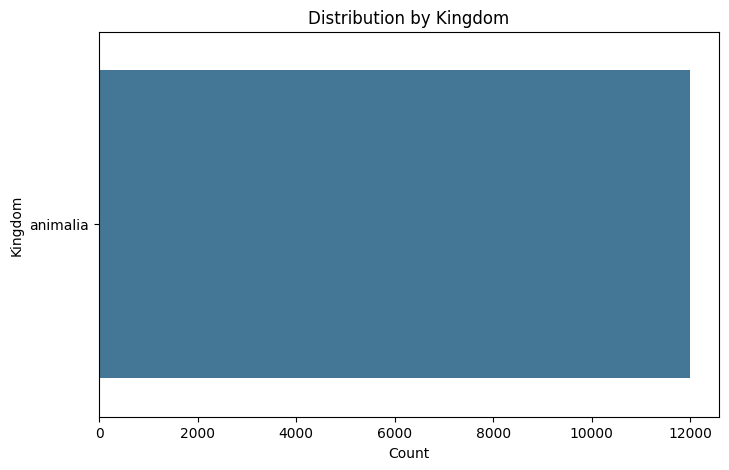

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(y='kingdom', data=df, order=df['kingdom'].value_counts().index, palette="mako")
plt.title('Distribution by Kingdom')
plt.xlabel('Count')
plt.ylabel('Kingdom')
plt.show()

In [29]:
# Count the occurrences of each unique value in the 'Kingdom' column
kingdom_counts = df['kingdom'].value_counts()
print("Kingdom Counts:\n", kingdom_counts)

Kingdom Counts:
 kingdom
animalia    11983
Name: count, dtype: int64


**Family Analyis**

In [34]:

family_counts = df['family'].value_counts()
num_families = len(family_counts)

print(f"Total number of unique Families (classes): {num_families}")
print(f"Top 10 most common Families:\n{family_counts.head(10)}")
print(f"Bottom 10 least common Families:\n{family_counts.tail(10)}")

Total number of unique Families (classes): 202
Top 10 most common Families:
family
dactyloidae        300
cercopithecidae    300
formicidae         291
carcharhinidae     270
salamandridae      270
plethodontidae     270
bovidae            240
bucerotidae        210
acroporidae        210
diomedeidae        180
Name: count, dtype: int64
Bottom 10 least common Families:
family
strigidae          30
vireonidae         30
cacatuidae         30
tettigoniidae      30
polyprionidae      30
cyprinodontidae    30
alligatoridae      30
balaenidae         30
goodeidae          30
siluridae          29
Name: count, dtype: int64


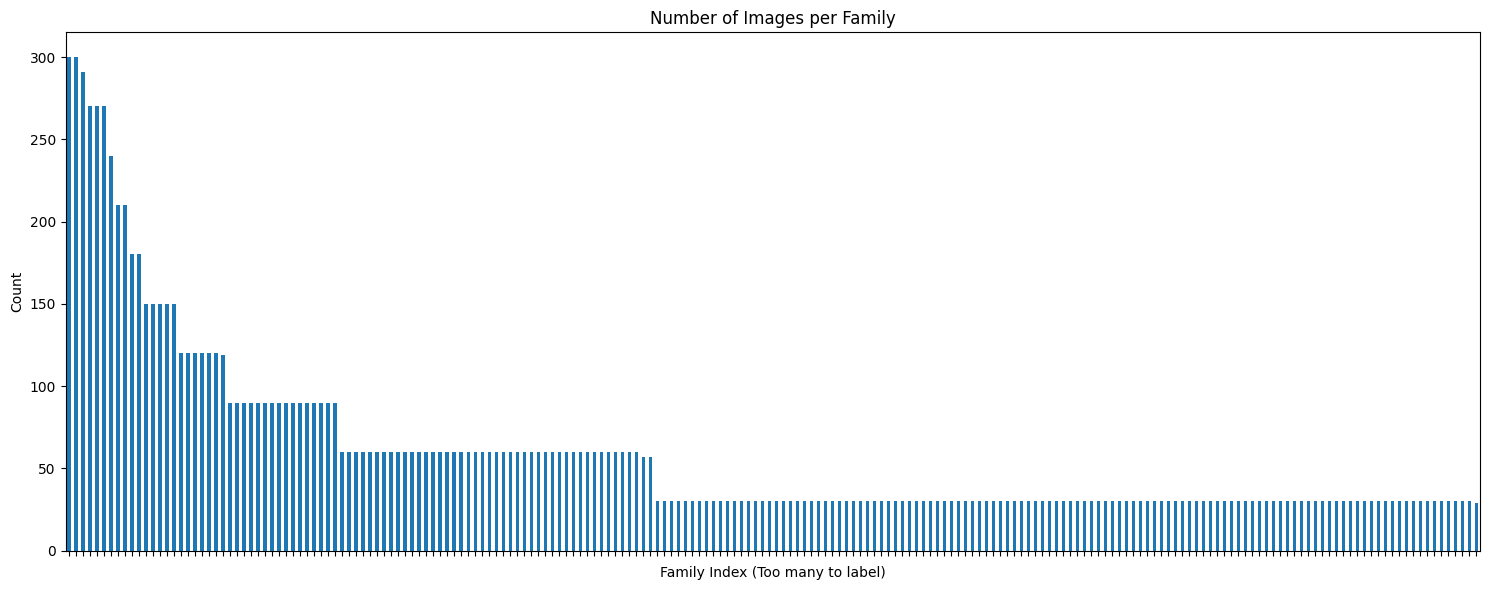

In [39]:
plt.figure(figsize=(15, 6))
family_counts.plot(kind='bar')
plt.title('Number of Images per Family')
plt.xlabel('Family Index (Too many to label)')
plt.ylabel('Count')
plt.xticks(ticks=plt.xticks()[0], labels=[])
plt.tight_layout()
plt.show()

In [21]:
max_count = family_counts.max()
min_count = family_counts.min()
imbalance_ratio = max_count / min_count
print(f"Most common family: {family_counts.index[0]} ({max_count} images)")
print(f"Least common family: {family_counts.index[-1]} ({min_count} images)")
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")

Most common family: dactyloidae (300 images)
Least common family: siluridae (29 images)
Imbalance ratio: 10.34:1


**Phyllum Analysis**

In [22]:
print("\nPhylum distribution:")
print(df['phylum'].value_counts())


Phylum distribution:
phylum
chordata         9952
arthropoda        951
cnidaria          810
mollusca          210
echinodermata      60
Name: count, dtype: int64


/tmp/ipython-input-2377706191.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phylum_counts.index, y=phylum_counts.values, palette="cubehelix")


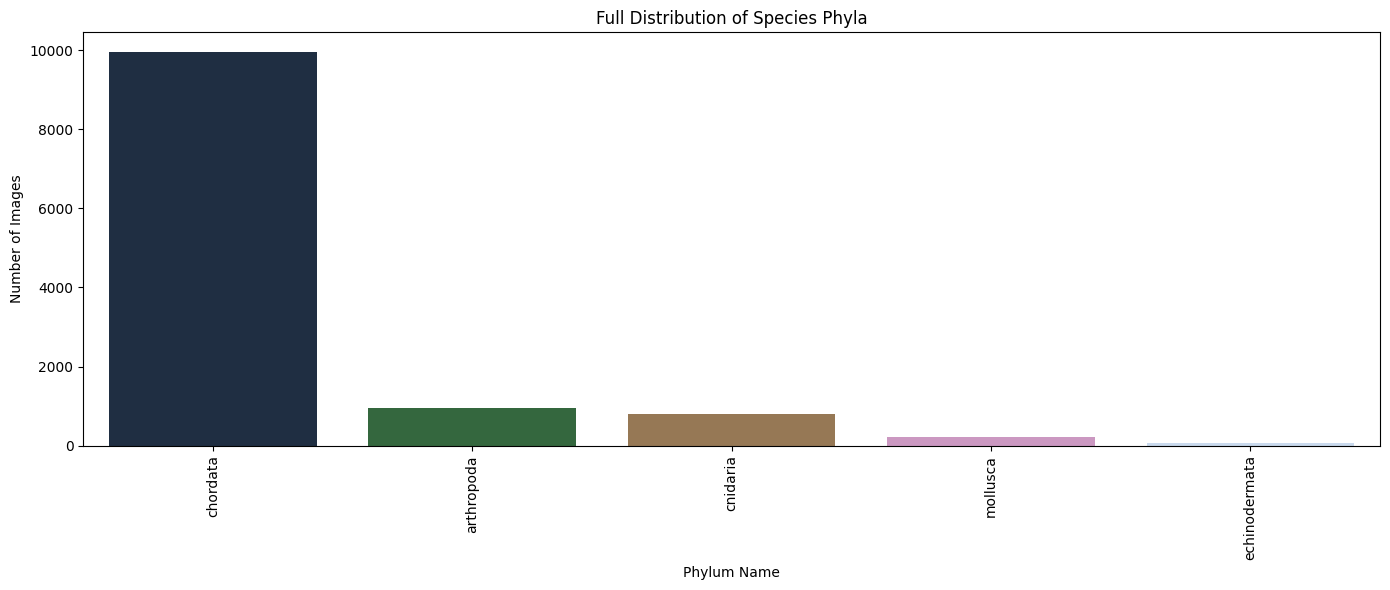

In [31]:

phylum_counts = df['phylum'].value_counts()
num_phyla = len(phylum_counts)

plt.figure(figsize=(14, 6))
sns.barplot(x=phylum_counts.index, y=phylum_counts.values, palette="cubehelix")
plt.title('Full Distribution of Species Phyla')
plt.xlabel('Phylum Name')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.tight_layout()

**Image exploration**

In [24]:
sample_paths = df['file_path'].head(10)
print("Checking if sample images exist:")
for path in sample_paths:
    full_path = os.path.join(DATA_DIR, path)
    exists = os.path.exists(full_path)
    print(f"{path}: {'yes' if exists else 'no'}")

Checking if sample images exist:
mollusca_unionidae/12853737_449393_eol-full-size-copy.jpg: yes
chordata_geoemydidae/20969394_793083_eol-full-size-copy.jpg: yes
chordata_cryptobranchidae/28895411_319982_eol-full-size-copy.jpg: yes
chordata_turdidae/29658536_45510188_eol-full-size-copy.jpg: yes
chordata_indriidae/21252576_7250886_eol-full-size-copy.jpg: yes
arthropoda_formicidae/28657539_491832_eol-full-size-copy.jpg: yes
chordata_fringillidae/29548208_47043290_eol-full-size-copy.jpg: yes
arthropoda_gomphidae/21232818_1033999_eol-full-size-copy.jpg: yes
chordata_myliobatidae/20315204_46561012_eol-full-size-copy.jpg: yes
chordata_pleuronectidae/20124498_46570095_eol-full-size-copy.jpg: yes


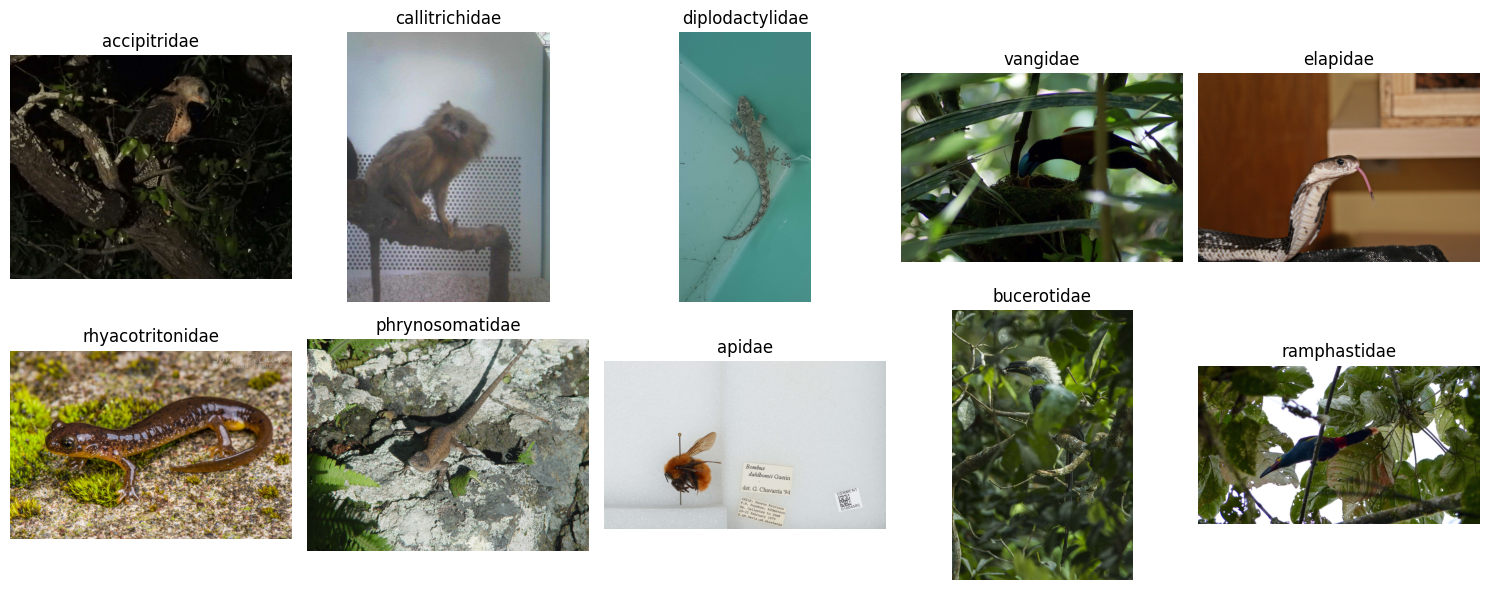

In [25]:
from PIL import Image

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i, (idx, row) in enumerate(df.sample(10).iterrows()):
    img_path = os.path.join(DATA_DIR, row['file_path'])
    if os.path.exists(img_path):
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(f"{row['family']}")
        axes[i].axis('off')
    if i >= 9:
        break

plt.tight_layout()
plt.show()

Image size comparison

In [45]:

#  Sampling
SAMPLE_SIZE = 1000
# Ensure we don't sample more than available
sample_size = min(SAMPLE_SIZE, len(df))

# Get a random sample of file paths from your DataFrame
# We combine the IMAGE_ROOT with the relative path from the CSV
df_sample = df.sample(n=sample_size, random_state=42)
sampled_full_paths = [os.path.join(DATA_DIR, path) for path in df_sample['file_path']]

# Initialize variables to track the smallest and largest images
largest_image_data = None
smallest_image_data = None
largest_size_area = 0
smallest_size_area = float('inf')


# Get a random sample of file paths from your DataFrame
# We combine the DATA_DIR with the relative path from the CSV
df_sample = df.sample(n=sample_size, random_state=42)
sampled_full_paths = [os.path.join(DATA_DIR, path) for path in df_sample['file_path']]

# Initialize variables to track the smallest and largest images
largest_image_data = None
smallest_image_data = None
largest_size_area = 0
smallest_size_area = float('inf')



In [46]:
for file_path in sampled_full_paths:

    # Check that the file path actually exists before trying to open it
    if not os.path.exists(file_path):
        # Skip files that are missing or corrupted
        continue

    try:
        # Open the image using PIL
        with Image.open(file_path) as img:
            width, height = img.size
            img_size_area = width * height

            # Overwrite if a larger image is found
            if img_size_area > largest_size_area:
                largest_size_area = img_size_area
                largest_image_data = (file_path, (width, height))

            # Overwrite if a smaller image is found
            if img_size_area < smallest_size_area:
                smallest_size_area = img_size_area
                smallest_image_data = (file_path, (width, height))

    except Exception as e:
        pass # Skip problematic files

print("Fast image size comparison complete.")

Fast image size comparison complete.


In [47]:
if largest_image_data and smallest_image_data:
    print("--- Image Size Extremes (1000 Samples) ---")

    # Largest Image Data
    print("\nLargest image found in sample:")
    print("File Path:", largest_image_data[0])
    print("Size (Width x Height):", largest_image_data[1])

    # Smallest Image Data
    print("\nSmallest image found in sample:")
    print("File Path:", smallest_image_data[0])
    print("Size (Width x Height):", smallest_image_data[1])
else:
    print("No images were found or processed successfully. Double-check your IMAGE_ROOT path.")

--- Image Size Extremes (1000 Samples) ---

Largest image found in sample:
File Path: /content/drive/MyDrive/NOVA_IMS/Deep_Learning_Project/rare_species/chordata_diomedeidae/28903695_45511277_eol-full-size-copy.jpg
Size (Width x Height): (8688, 5792)

Smallest image found in sample:
File Path: /content/drive/MyDrive/NOVA_IMS/Deep_Learning_Project/rare_species/chordata_acipenseridae/30098483_205909_eol-full-size-copy.jpg
Size (Width x Height): (289, 237)
